In [1]:
#Basic Libraries
import numpy as np
import pandas as pd

#visualization libraries
import matplotlib.pyplot as plt
import pydot
import seaborn as sns

#Evaluation Library
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

#Deep learning libraries
import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.datasets import mnist
from keras.utils import to_categorical
from scikeras.wrappers import KerasClassifier

In [2]:
#!pip install pydot

In [3]:
#!pip install tensorflow

In [4]:
#!pip install keras

In [5]:
#!pip install scikeras

In [6]:
#Digit MNIST dataset
(x_train_digit, y_train_digit), (x_test_digit, y_test_digit) = mnist.load_data()

In [7]:
#x_train_digit

In [8]:
y_train_digit

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

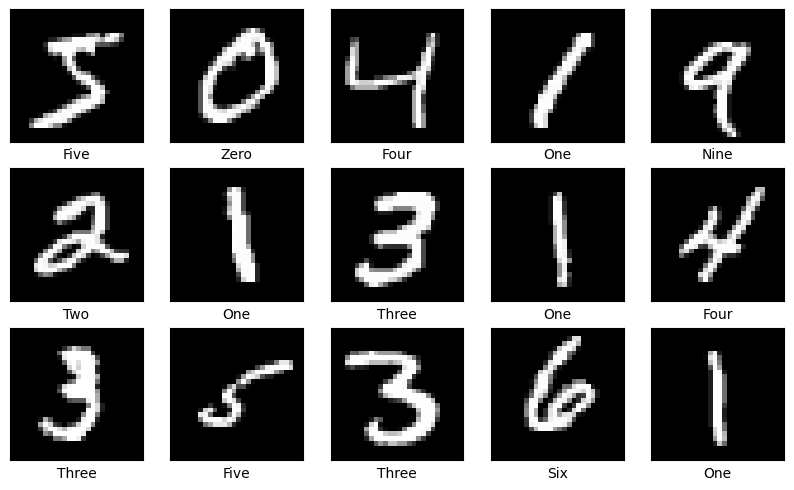

In [9]:
#Names of numbers in the dataset in order
col_names = ['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']

#Visualizing the digits
plt.figure(figsize = (10, 10))
for i in range(15):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train_digit[i], cmap = 'gray')
    plt.xlabel(col_names[y_train_digit[i]])
plt.show()

In [10]:
x_train_digit.shape 
#60000 - training set count
#28x28 = 784 => Have to convert to give as an input because ANN only performs for 2D data.
#It's called "Flattern"

(60000, 28, 28)

In [11]:
#converting as a columns
x_train_digit = x_train_digit.reshape(60000, 784)
x_test_digit = x_test_digit.reshape(10000, 784)

In [12]:
x_train_digit.shape

(60000, 784)

In [13]:
y_test_digit.shape

(10000,)

In [14]:
#Encoding Digit MNIST Labels
y_train_digit = to_categorical(y_train_digit, num_classes = 10)
y_test_digit = to_categorical(y_test_digit, num_classes = 10)
#for ANN 1 daiomentianla Data irunthal one_hot encodingku convert pannithan input kudukanum.

In [15]:
y_train_digit.shape

(60000, 10)

In [16]:
#Model creation is a sequential process
#creating base neural network
model = keras.Sequential([
    layers.Input(shape=(784,)),
    layers.Dense(256, activation = 'relu'),
    #layers.Dropout(0.3)
    #layers.BatchNormalization(),
    layers.Dense(64, activation = 'relu'),
    #layers.Dropout(0.3)
    #layers.BatchNormalization(),
    layers.Dense(64, activation = 'relu'),
    #layers.Dropout(0.3)
    #layers.BatchNormalization(),
    layers.Dense(10, activation = 'sigmoid'),
])

In [17]:
#param_number = output_channel_number * input_channel_number + 1)
model.summary()
#256 * (784+1) = 200960

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 222,218 (868.04 KB)

 Trainable params: 222,218 (868.04 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
#Deep Learning
#  1.Brain Creation
#  2.Compiling
#  3.Fit method

In [19]:
#Compiling The Model
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ['accuracy'])

In [20]:
history = model.fit(x_train_digit, y_train_digit, batch_size = 100, epochs = 10, validation_data = (x_test_digit, y_test_digit))

Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6260 - loss: 3.5796 - val_accuracy: 0.8396 - val_loss: 0.3649
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8482 - loss: 0.3001 - val_accuracy: 0.8379 - val_loss: 0.2917
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8624 - loss: 0.2029 - val_accuracy: 0.8523 - val_loss: 0.2239
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8720 - loss: 0.1577 - val_accuracy: 0.8528 - val_loss: 0.2078
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8867 - loss: 0.1293 - val_accuracy: 0.8937 - val_loss: 0.2360
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8941 - loss: 0.1256 - val_accuracy: 0.9013 - val_loss: 0.1739
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8707 - loss: 0.1059 - val_accuracy: 0.8957 - val_loss: 0.1676
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8930 - loss: 0.0924 - val_accuracy: 0.

In [21]:
#Predicting the labels-DIGIT
y_predict = model.predict(x_test_digit)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [22]:
y_predict[0]

array([2.0449994e-10, 2.2558114e-03, 9.7490001e-01, 1.0000000e+00,
       9.9998266e-01, 6.2587074e-10, 1.0229825e-11, 1.0000000e+00,
       5.4111488e-06, 1.0000000e+00], dtype=float32)

In [23]:
y_predicts = np.argmax(y_predict, axis = 1) #here we get the index of maximum value in the encoded vector

In [24]:
y_predicts

array([3, 2, 1, ..., 4, 3, 4])

In [25]:
y_test_digit_eval = np.argmax(y_test_digit, axis = 1)

In [26]:
y_test_digit_eval

array([7, 2, 1, ..., 4, 5, 6])

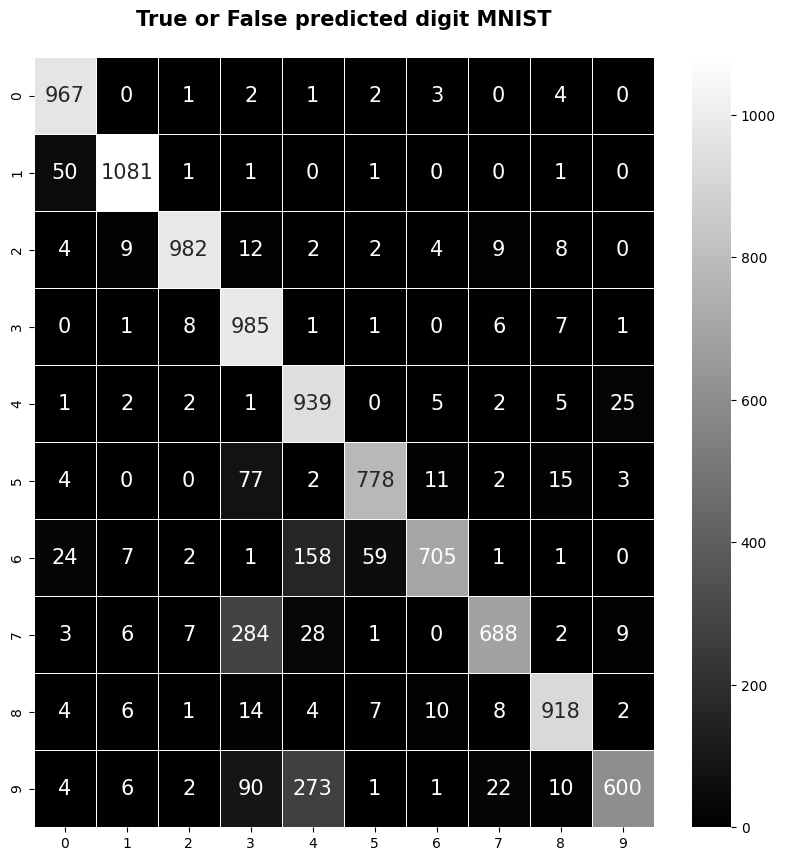

In [34]:
#Confusion matrix for Digit MNIST
con_mat = confusion_matrix(y_test_digit_eval, y_predicts)
plt.style.use('seaborn-v0_8-deep')
plt.figure(figsize = (10, 10))
sns.heatmap(con_mat, annot = True, annot_kws = {'size': 15}, linewidths = 0.5, fmt = "d", cmap = "gray")
plt.title('True or False predicted digit MNIST\n', fontweight = 'bold', fontsize = 15)
plt.show()

In [35]:
#print(plt.style.available)

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test_digit_eval,y_predicts))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       980
           1       0.97      0.95      0.96      1135
           2       0.98      0.95      0.96      1032
           3       0.67      0.98      0.80      1010
           4       0.67      0.96      0.79       982
           5       0.91      0.87      0.89       892
           6       0.95      0.74      0.83       958
           7       0.93      0.67      0.78      1028
           8       0.95      0.94      0.94       974
           9       0.94      0.59      0.73      1009

    accuracy                           0.86     10000
   macro avg       0.89      0.86      0.86     10000
weighted avg       0.89      0.86      0.86     10000



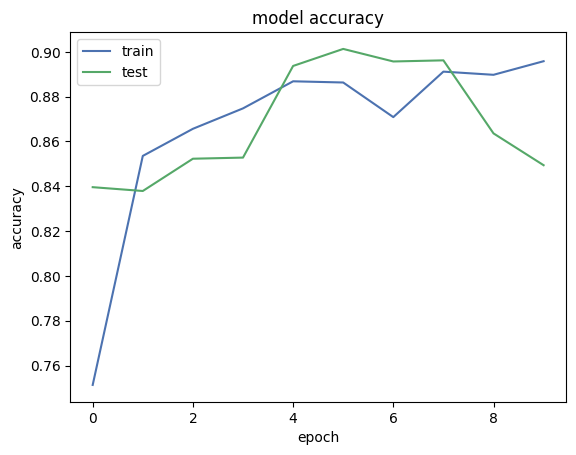

In [37]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

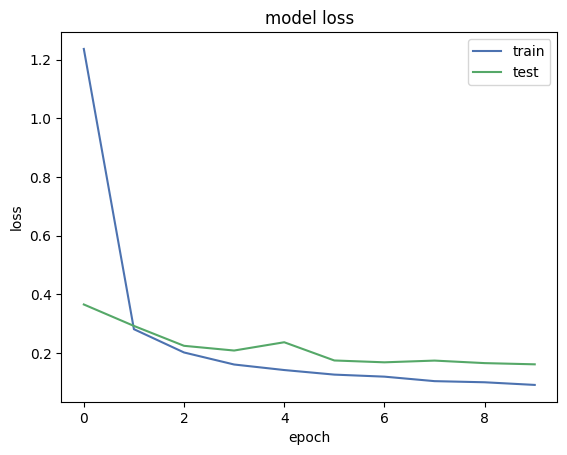

In [38]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [40]:
#tf.expand_dims(X_test_digit[0])
y_predict_single = model.predict(x_test_digit[[2]])
y_predicts_single=np.argmax(y_predict_single, axis=1) # Here we get the index of maximum value in the encoded vector
y_test_digit_eval=np.argmax(y_test_digit, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


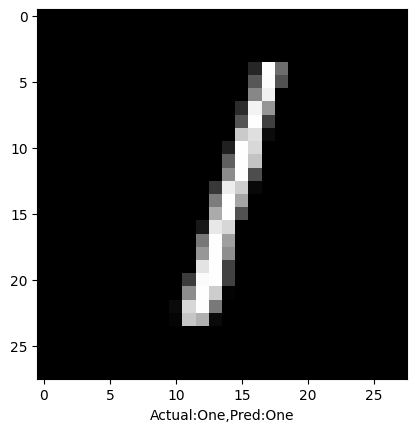

In [44]:
#Names of numbers in the dataset in order
col_names = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

#Visualizing the digits
#plt.figure(figsize=(10,10))
plt.imshow(x_test_digit[2].reshape(28,28), cmap='gray')
plt.xlabel("Actual:{},Pred:{}".format(col_names[np.argmax(y_test_digit[2])],col_names[y_predicts_single[0]]))
plt.show()